# Electron-photon scattering probabilities

In this notebook, we inspect the electron-photon scattering cross sections. At the smallest scale, the SZ effect comes from single electron-photon scatterings and as such, it is good to investigate this part of `MockSZ` a little bit.

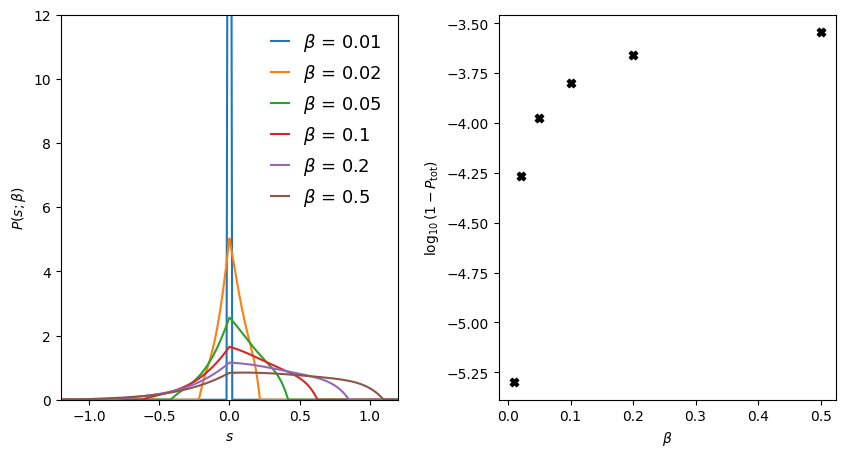

In [31]:
import numpy as np
import matplotlib.pyplot as pt

import MockSZ.SingleStats as MSingle

num_arr = 3000                                                                                                                                                         
s = np.linspace(-1.2, 1.2, num=num_arr)                                                                                                                                     
beta = np.array([0.01, 0.02, 0.05, 0.10, 0.20, 0.50])                                                                                                                                                            

amplitudes = MSingle.getPsbThomson(s, beta, num_arr) 

ds = s[1] - s[0]

check = np.sum(amplitudes * ds, axis=0)

fig, ax = pt.subplots(1,2, figsize=(10,5), gridspec_kw={"wspace":0.3})
ax[0].plot(s, amplitudes, label=[r"$\beta$ = " + x for x in beta.astype(str)])
ax[0].set_ylim(0, 12)
ax[0].set_xlim(-1.2, 1.2)

ax[0].set_ylabel(r"$P(s;\beta)$")
ax[0].set_xlabel(r"$s$")
ax[0].legend(frameon=False, prop={'size': 13},handlelength=1)

ax[1].scatter(beta, np.log10(1 - check), marker="X", color="black")
ax[1].set_ylabel(r"$\log_{10}(1 - P_\mathrm{tot})$")
ax[1].set_xlabel(r"$\beta$")

pt.show()

The curves in the left panel represent the scattering probability $P(s;\beta)$: the probability that an electron with velocity $\beta = v / c$ in the lab frame undergoes a scattering interaction with a photon at frequency $\nu_0$, such that the photon has a new frequency $\nu$, averaged over all photon incidence angles $\mu$. This frequency shift is expressed by the logarithmic frequency shift $s=\ln(\frac{\nu}{\nu_0})$.

Note how the scattering probability grows wider and more asymmetric for increasing $\beta$, showing a higher probability for upscattering. This is due to the higher electron velocity, which increases he probability of upscattering a photon.

As a check, we calculated the total integrated $P(s;\beta)$ over $s$, $P_\mathrm{tot}$. Because $P(s;\beta)$ is a probability, this value should be 1. In the right panel, we show the error of our calculation. It can be seen that the error is o the order of a thousandth which serves as a reassuring sanity check.